# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, add it to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0   # Reset record_count for each set

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | mercedes
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | chibougamau
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | st. john's
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | chikhli
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | guillena
Processing Record 16 of Set 1 | vikulovo
Processing Record 17 of Set 1 | northam
Processing Record 18 of Set 1 | golub-dobrzyn
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | kataragama
City not found. Skipping...
Processing Record 21 of Set 1 | urambo
Processing Record 22 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,15.17,56,100,3.41,NZ,1707687938
1,grytviken,-54.2811,-36.5092,3.59,94,97,7.17,GS,1707687938
2,mercedes,-34.6515,-59.4307,32.66,51,92,2.14,AR,1707687939
3,longyearbyen,78.2186,15.6401,-6.09,73,75,6.69,SJ,1707687875
4,chibougamau,49.9168,-74.3659,-8.21,79,100,2.57,CA,1707687939


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,15.17,56,100,3.41,NZ,1707687938
1,grytviken,-54.2811,-36.5092,3.59,94,97,7.17,GS,1707687938
2,mercedes,-34.6515,-59.4307,32.66,51,92,2.14,AR,1707687939
3,longyearbyen,78.2186,15.6401,-6.09,73,75,6.69,SJ,1707687875
4,chibougamau,49.9168,-74.3659,-8.21,79,100,2.57,CA,1707687939


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

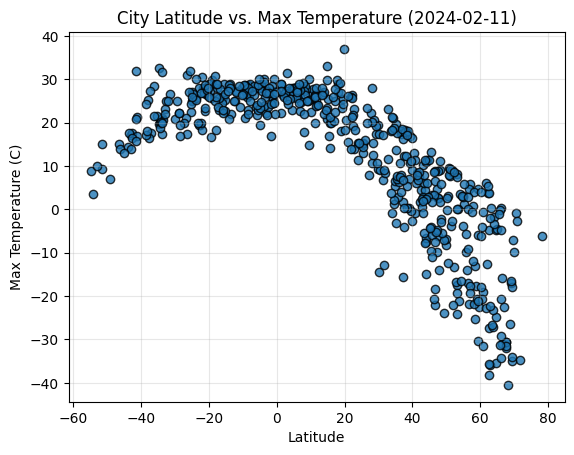

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
            marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True, alpha=0.3)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

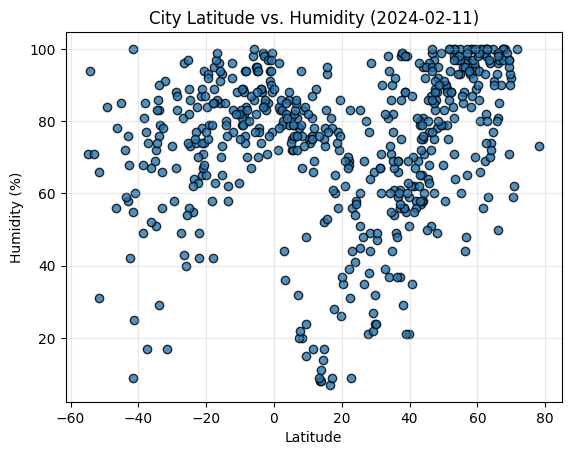

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], 
            marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True, alpha=0.3)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

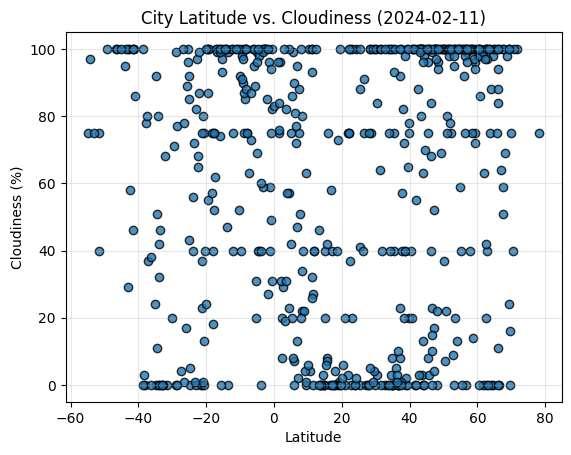

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], 
            marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True, alpha=0.3)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

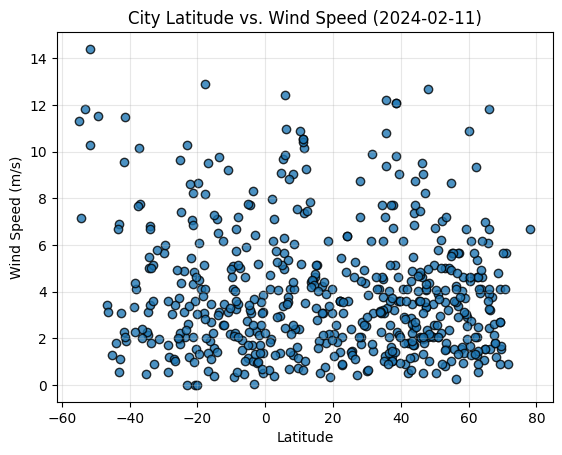

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
            marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True, alpha=0.3)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = slope * x + intercept
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="r")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f'The r-squared value is: {rvalue**2:.2f}')
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,longyearbyen,78.2186,15.6401,-6.09,73,75,6.69,SJ,1707687875
4,chibougamau,49.9168,-74.3659,-8.21,79,100,2.57,CA,1707687939
6,st. john's,47.5649,-52.7093,2.66,89,100,2.06,CA,1707687917
8,chikhli,20.3500,76.2500,20.52,35,6,2.20,IN,1707687940
9,hawaiian paradise park,19.5933,-154.9731,25.57,86,100,3.09,US,1707687875


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,15.17,56,100,3.41,NZ,1707687938
1,grytviken,-54.2811,-36.5092,3.59,94,97,7.17,GS,1707687938
2,mercedes,-34.6515,-59.4307,32.66,51,92,2.14,AR,1707687939
5,carnarvon,-24.8667,113.6333,25.32,73,0,7.43,AU,1707687939
7,puerto natales,-51.7236,-72.4875,9.25,66,75,10.29,CL,1707687940


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.72


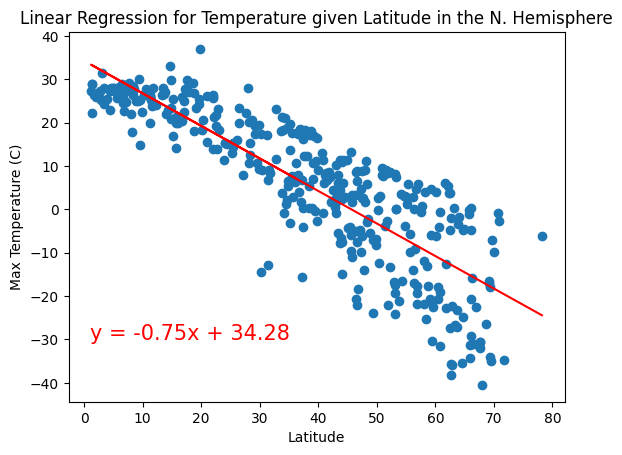

In [33]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Max Temp"],
                       "Linear Regression for Temperature given Latitude in the N. Hemisphere",
                       "Latitude",
                       "Max Temperature (C)",
                       (1, -30))

The r-squared value is: 0.36


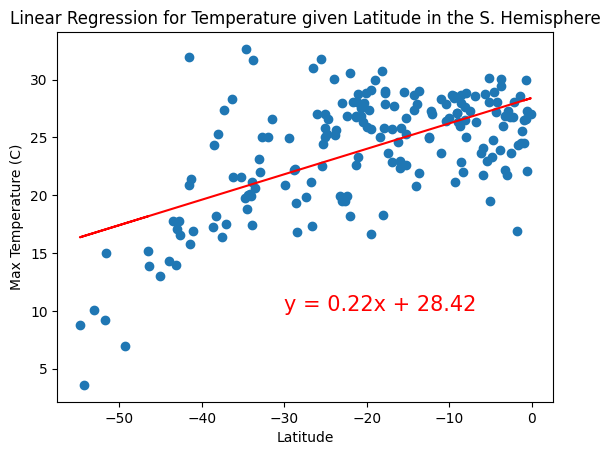

In [34]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                       "Linear Regression for Temperature given Latitude in the S. Hemisphere",
                       "Latitude",
                       "Max Temperature (C)",
                       (-30, 10))

**Discussion about the linear relationship:** In the Northern hemisphere, latitude and temperature appear to have a negative relationship, with latitude being a good predictor of max temperature with an R squared value of 0.72. In the Southern hemisphere, latitude and temperature appear to have a positive relationship, however latitude appears to be less predictive of temperature with an R squared value of 0.36.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.17


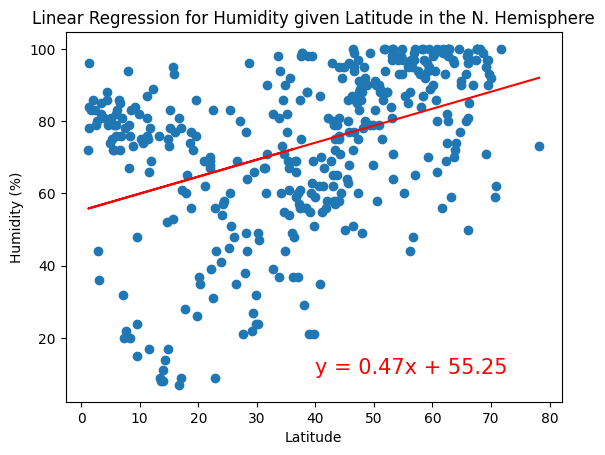

In [37]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Humidity"],
                       "Linear Regression for Humidity given Latitude in the N. Hemisphere",
                       "Latitude",
                       "Humidity (%)",
                       (40, 10))

The r-squared value is: 0.21


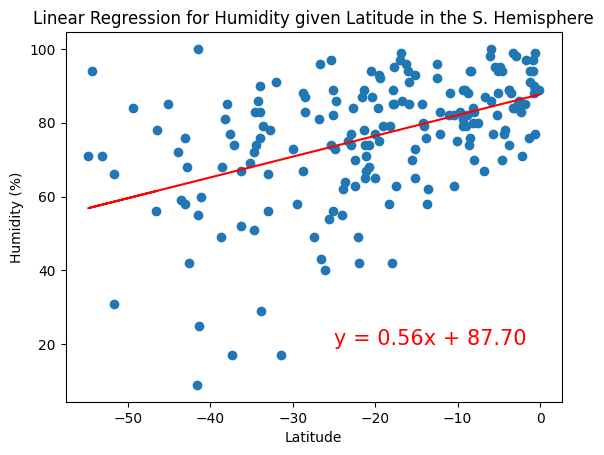

In [41]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Humidity"],
                       "Linear Regression for Humidity given Latitude in the S. Hemisphere",
                       "Latitude",
                       "Humidity (%)",
                       (-25, 20))

**Discussion about the linear relationship:** For both the Northern and Southern hemispheres, latitude and humidity appears to have a positive relationship, however for both hemispheres humidity does not appear to be a very good predictor of humidity, with low R-squared values. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.09


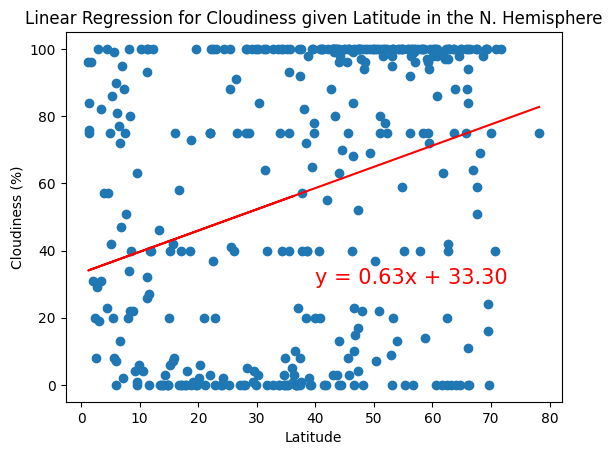

In [44]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       "Linear Regression for Cloudiness given Latitude in the N. Hemisphere",
                       "Latitude",
                       "Cloudiness (%)",
                       (40, 30))

The r-squared value is: 0.04


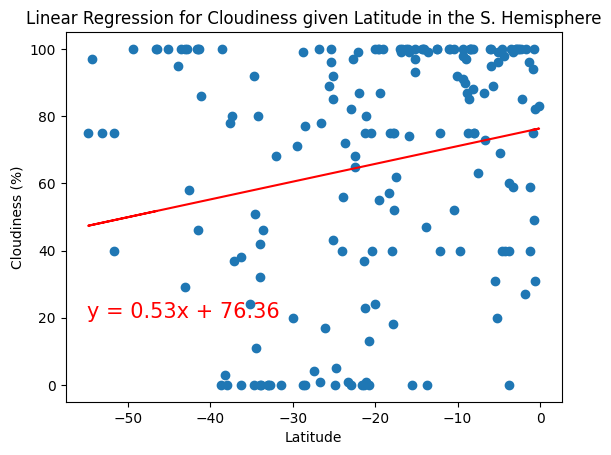

In [47]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       "Linear Regression for Cloudiness given Latitude in the S. Hemisphere",
                       "Latitude",
                       "Cloudiness (%)",
                       (-55, 20))

**Discussion about the linear relationship:** In both the Northern and Southern hemispheres, latitude and cloudiness appear to have positive relationships. The Northern hemisphere appears to have a slightly stronger positive relationship, but this may be due to having a larger sample by chance of Northern hemisphere cities than Southern hemisphere cities. For both hemispheres, latitude does not appear to be a good predictor of cloudiness, with low R squared values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.01


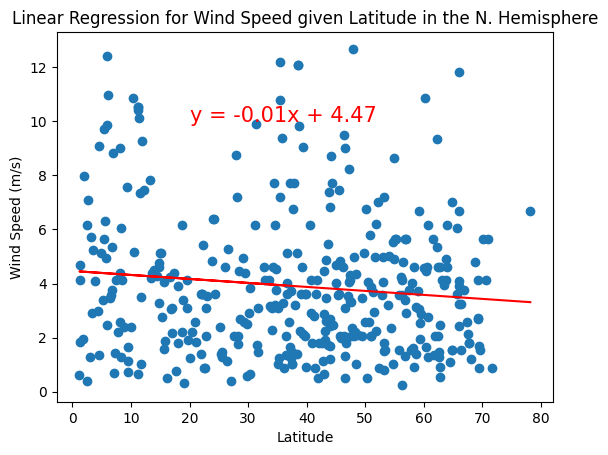

In [49]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"],
                       "Linear Regression for Wind Speed given Latitude in the N. Hemisphere",
                       "Latitude",
                       "Wind Speed (m/s)",
                       (20, 10))

The r-squared value is: 0.08


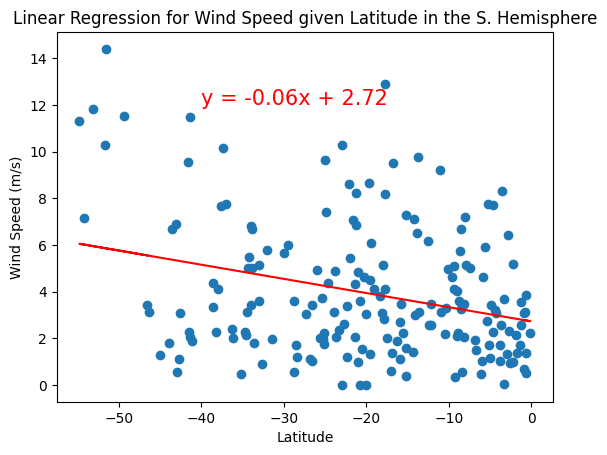

In [52]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"],
                       "Linear Regression for Wind Speed given Latitude in the S. Hemisphere",
                       "Latitude",
                       "Wind Speed (m/s)",
                       (-40, 12))

**Discussion about the linear relationship:** In both hemispheres, wind speed and latitude appear to have a slight negative relationship, with latitude being a poor predictor of wind speed wth very low E squared values.